### Note for question2 
- Please follow the template to complete q2
- You may create new cells to report your results and observations

In [1]:
# Import modules
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn import linear_model

## P1. Create data and plot
### TODO
- implement the true function $f(x)$ defined in the write-up 
- use function name **model()**
- sample 30 random points with noise
- plot sampled points together with the model function

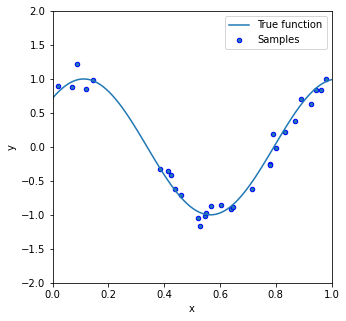

In [2]:
# Define the function to generate data points
def model(X):
    return np.sin((2.2 * np.pi * X)+0.8)

# Initialize random seed
np.random.seed(0)
# Generate noisy data points: (x,y)
n_samples = 30
x = np.sort(np.random.rand(n_samples))
y = model(x) + np.random.randn(n_samples) * 0.1
# Plot true model and sampled data points
plt.figure(figsize=(5, 5))
X_test = np.linspace(0, 1, 100)
plt.plot(X_test, model(X_test), label="True function")
plt.scatter(x, y, edgecolor='b', s=20, label="Samples")
plt.xlabel("x")
plt.ylabel("y")
plt.xlim((0,1))
plt.ylim((-2,2))
plt.legend(loc="best")

## P2. Fit a linear model
### TODO
- use sklearn to fit model: $h(x) = w_0 + w_1x$
- report $w=[w_0,w_1]$
- plot the fitted model $h(x)$ together with data points

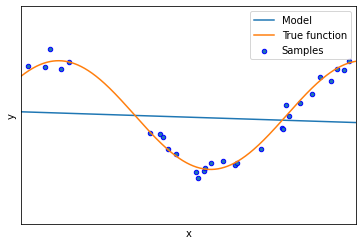

[0.060380938946189996, -0.19787027099625884]


In [3]:
# Fit a linear model in the original space
# Plot fitted linear model
degrees = [1]
for i in range(len(degrees)):
    ax = plt.subplot(1, len(degrees), i + 1)
    plt.setp(ax, xticks=(), yticks=())
    
    linear_regression = LinearRegression()
    
    pipeline = Pipeline([("linear_regression", linear_regression)])
    
    # We fit the model
    pipeline.fit(x[:, np.newaxis], y)

    # Visualize predictions
    X_test = np.linspace(0, 1, 1000)
    plt.plot(X_test, pipeline.predict(X_test[:, np.newaxis]), label="Model")
    plt.plot(X_test, model(X_test), label="True function")
    plt.scatter(x, y, edgecolor='b', s=20, label="Samples")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.xlim((0, 1))
    plt.ylim((-2, 2))
    plt.legend(loc="best")
    plt.show()
w1 = linear_regression.coef_
w1 = (w1[0])
w0 = (linear_regression.intercept_)
w = print([w0,w1])

## P3. Fit a polynomial curve
### TODO
- augment the original feature to $[x, x^2, \cdots, x^{15}]$
- fit the polynomial curve: $h(x) = \sum_{i=0}^{15} w_i x^{i}$
- report $w=[w_0,w_1, \cdots, w_{15}]$
- plot the fitted model $h(x)$ together with data points

In [4]:
# Augment the original feature to a 15-vector
degrees = [15]

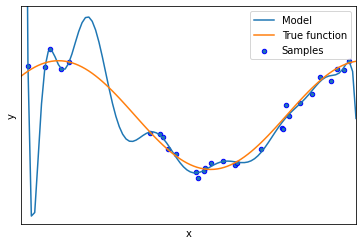

[ 0.00000000e+00 -2.97809480e+03  1.03892675e+05 -1.87418803e+06
  2.03715545e+07 -1.44872449e+08  7.09311984e+08 -2.47064769e+09
  6.24558698e+09 -1.15676113e+10  1.56894446e+10 -1.54005585e+10
  1.06456986e+10 -4.91376344e+09  1.35919341e+09 -1.70380431e+08]


In [5]:
# Fit linear model to the generated 15-vector features

for i in range(len(degrees)):
    ax = plt.subplot(1, len(degrees), i + 1)
    plt.setp(ax, xticks=(), yticks=())
    
    linear_regression = LinearRegression()
    polynomial_features = PolynomialFeatures(degree=degrees[i],include_bias=True)
    pipeline = Pipeline([("polynomial_features", polynomial_features),("linear_regression", linear_regression)])
    
    # We fit the model
    pipeline.fit(x[:, np.newaxis], y)
# Plot fitted curve and sampled data points
    X_test = np.linspace(0, 1, 100)
    plt.plot(X_test, pipeline.predict(X_test[:, np.newaxis]), label="Model")
    plt.plot(X_test, model(X_test), label="True function")
    plt.scatter(x, y, edgecolor='b', s=20, label="Samples")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.xlim(0, 1)
    plt.ylim(-2, 2)
    plt.legend()
    plt.grid()
plt.show()
    
w_ = print(linear_regression.coef_)
# w_0 = (linear_regression.intercept_)


## P4. Lasso regularization
### TODO
- use sklearn to fit a 15-degree polynomial model with L1 regularization
- report $w$
- plot the fitted model $h(x)$ together with data points

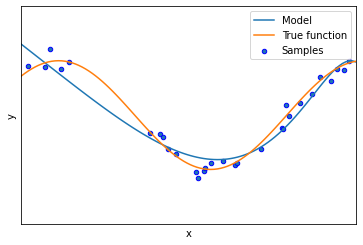

[ 0.00000000e+00 -2.97809480e+03  1.03892675e+05 -1.87418803e+06
  2.03715545e+07 -1.44872449e+08  7.09311984e+08 -2.47064769e+09
  6.24558698e+09 -1.15676113e+10  1.56894446e+10 -1.54005585e+10
  1.06456986e+10 -4.91376344e+09  1.35919341e+09 -1.70380431e+08]


In [6]:
# Fit 15-degree polynomial with L1 regularization
degrees_1 = [15]
# Start with lambda(alpha) = 0.01 and max_iter = 1e4

for i in range(len(degrees_1)):
    ax = plt.subplot(1, len(degrees_1), i + 1)
    plt.setp(ax, xticks=(), yticks=())
    
    linear_regression_Lasso = linear_model.Lasso(alpha = 0.00226787657)
    polynomial_features = PolynomialFeatures(degree=degrees_1[i],include_bias=True)
    pipeline = Pipeline([("polynomial_features", polynomial_features),("linear_regression", linear_regression_Lasso)])
    
    # We fit the model
    pipeline.fit(x[:, np.newaxis], y)
# Plot fitted curve and sampled data points
    X_test = np.linspace(0, 1, 100)
    plt.plot(X_test, pipeline.predict(X_test[:, np.newaxis]), label="Model")
    plt.plot(X_test, model(X_test), label="True function")
    plt.scatter(x, y, edgecolor='b', s=20, label="Samples")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.xlim(0, 1)
    plt.ylim(-2, 2)
    plt.legend()
    plt.grid()
plt.show()
w_ = print(linear_regression.coef_)

Lasso regression is a linear regression type which adds an absolue value of the sum of the product of w_j and lambda to the cost function. Lasso regression helps reduce overfitting and also helps in feature selection. When lambda is reduced, the model fits the original function much better, however the model can still be seen to be overfitting.When lambda is smaller, the model fits the true function better.

## P5. Ridge regularization
### TODO
- use sklearn to fit a 15-degree polynomial model with L2 regularization
- report $w$
- plot the fitted model $h(x)$ together with data points

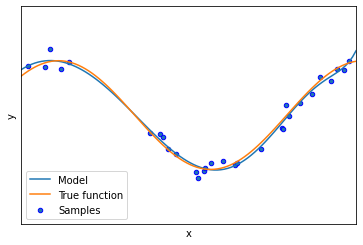

In [7]:
from sklearn.linear_model import Ridge
# Fit 15-degree polynomial with L2 regularization
degrees_2 = [15]
# Start with lambda(alpha) = 0.01 and max_iter = 1e4
for i in range(len(degrees_2)):
    ax = plt.subplot(1, len(degrees_2), i + 1)
    plt.setp(ax, xticks=(), yticks=())
    
    linear_regression_Ridge = Ridge(alpha = 0.00001)
    polynomial_features = PolynomialFeatures(degree=degrees_2[i],include_bias=True)
    pipeline = Pipeline([("polynomial_features", polynomial_features),("linear_regression", linear_regression_Ridge)])
    
    # We fit the model
    pipeline.fit(x[:, np.newaxis], y)
# Plot fitted curve and sampled data points
    X_test = np.linspace(0, 1, 100)
    plt.plot(X_test, pipeline.predict(X_test[:, np.newaxis]), label="Model")
    plt.plot(X_test, model(X_test), label="True function")
    plt.scatter(x, y, edgecolor='b', s=20, label="Samples")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.xlim(0, 1)
    plt.ylim(-2, 2)
    plt.legend()
    plt.grid()
plt.show()
# Plot fitted curve and sampled data points and compare to L1 regularization from P4